## ML for Crypto - Task 2

## Imports

In [1]:
from utils.algorithms import run_md5, run_sha, run_MatTheHash, run_random_hash
from utils.utils import produce_data, results_to_arr, AlgorithmArgs
from utils.criteria import test_SAC_BIC, analyze_results_BIC, analyze_results_SAC, test_colision_detection
from utils.plots import plot_BIC_results, plot_collision_histograms, plot_collision_success_rates, plot_genetic_convergence, plot_SAC_results

## SAC Analysis

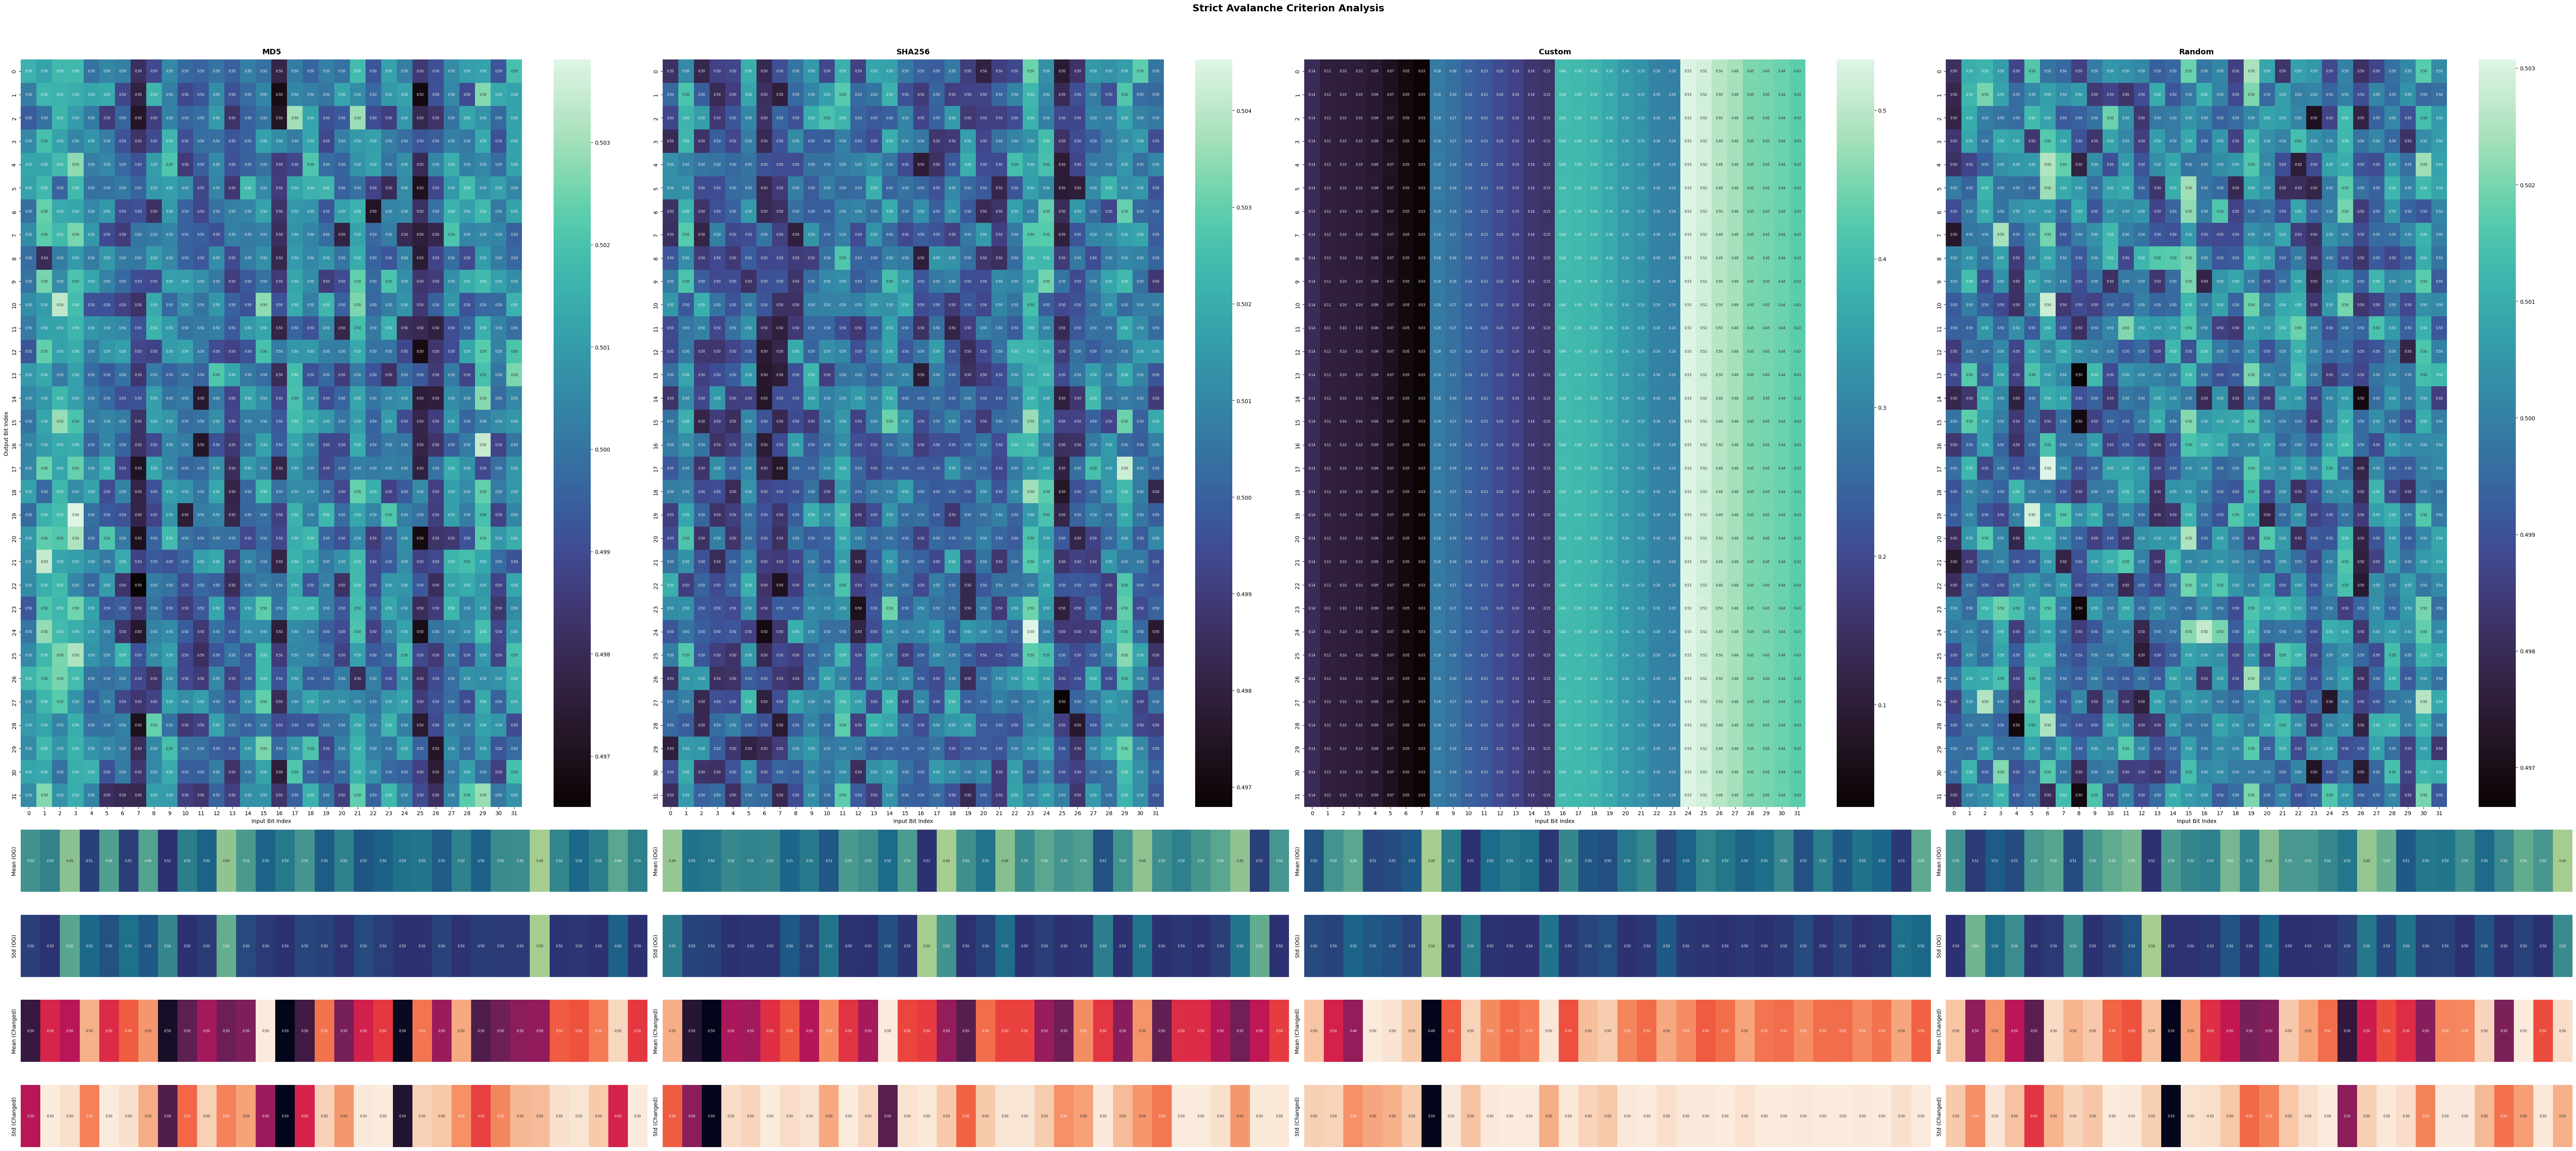

In [2]:
all_results = {}
n_examples = 10000
testing_size = 32 # in bits

algorithms = {
    "MD5" : (run_md5, 64),
    "SHA256" : (run_sha, 64),
    "Custom" : (run_MatTheHash, 64),
    "Random" : (run_random_hash, 64)
}

for alg_name, input_data in algorithms.items():
    hash_func, message_size = input_data
    data = produce_data(n_examples=n_examples,
                        message_size=message_size)
    results = test_SAC_BIC(data=data,
                       message_size=message_size,
                       testing_size=testing_size,
                       hash_func=hash_func)

    arr_original, arr_changed, arr_delta = results_to_arr(results=results)
    results_matrix, bit_means_changed, bit_std_changed, bit_means_og, bit_std_og = analyze_results_SAC(arr_original=arr_original, 
                                                                                                       arr_changed=arr_changed,
                                                                                                       arr_delta=arr_delta)
    corr_matrix = analyze_results_BIC(arr_delta)
    all_results[alg_name] = (results_matrix.copy(),
                             bit_means_changed.copy(),
                             bit_std_changed.copy(),
                             bit_means_og.copy(),
                             bit_std_og.copy(),
                             corr_matrix.copy())
    
plot_SAC_results(all_results,
                 figsize=(66, 30),
                 title="Strict Avalanche Criterion Analysis",
                 x_label="Input Bit Index",
                 y_label="Output Bit Index",
                 annot_values=True,
                 normalize=False)


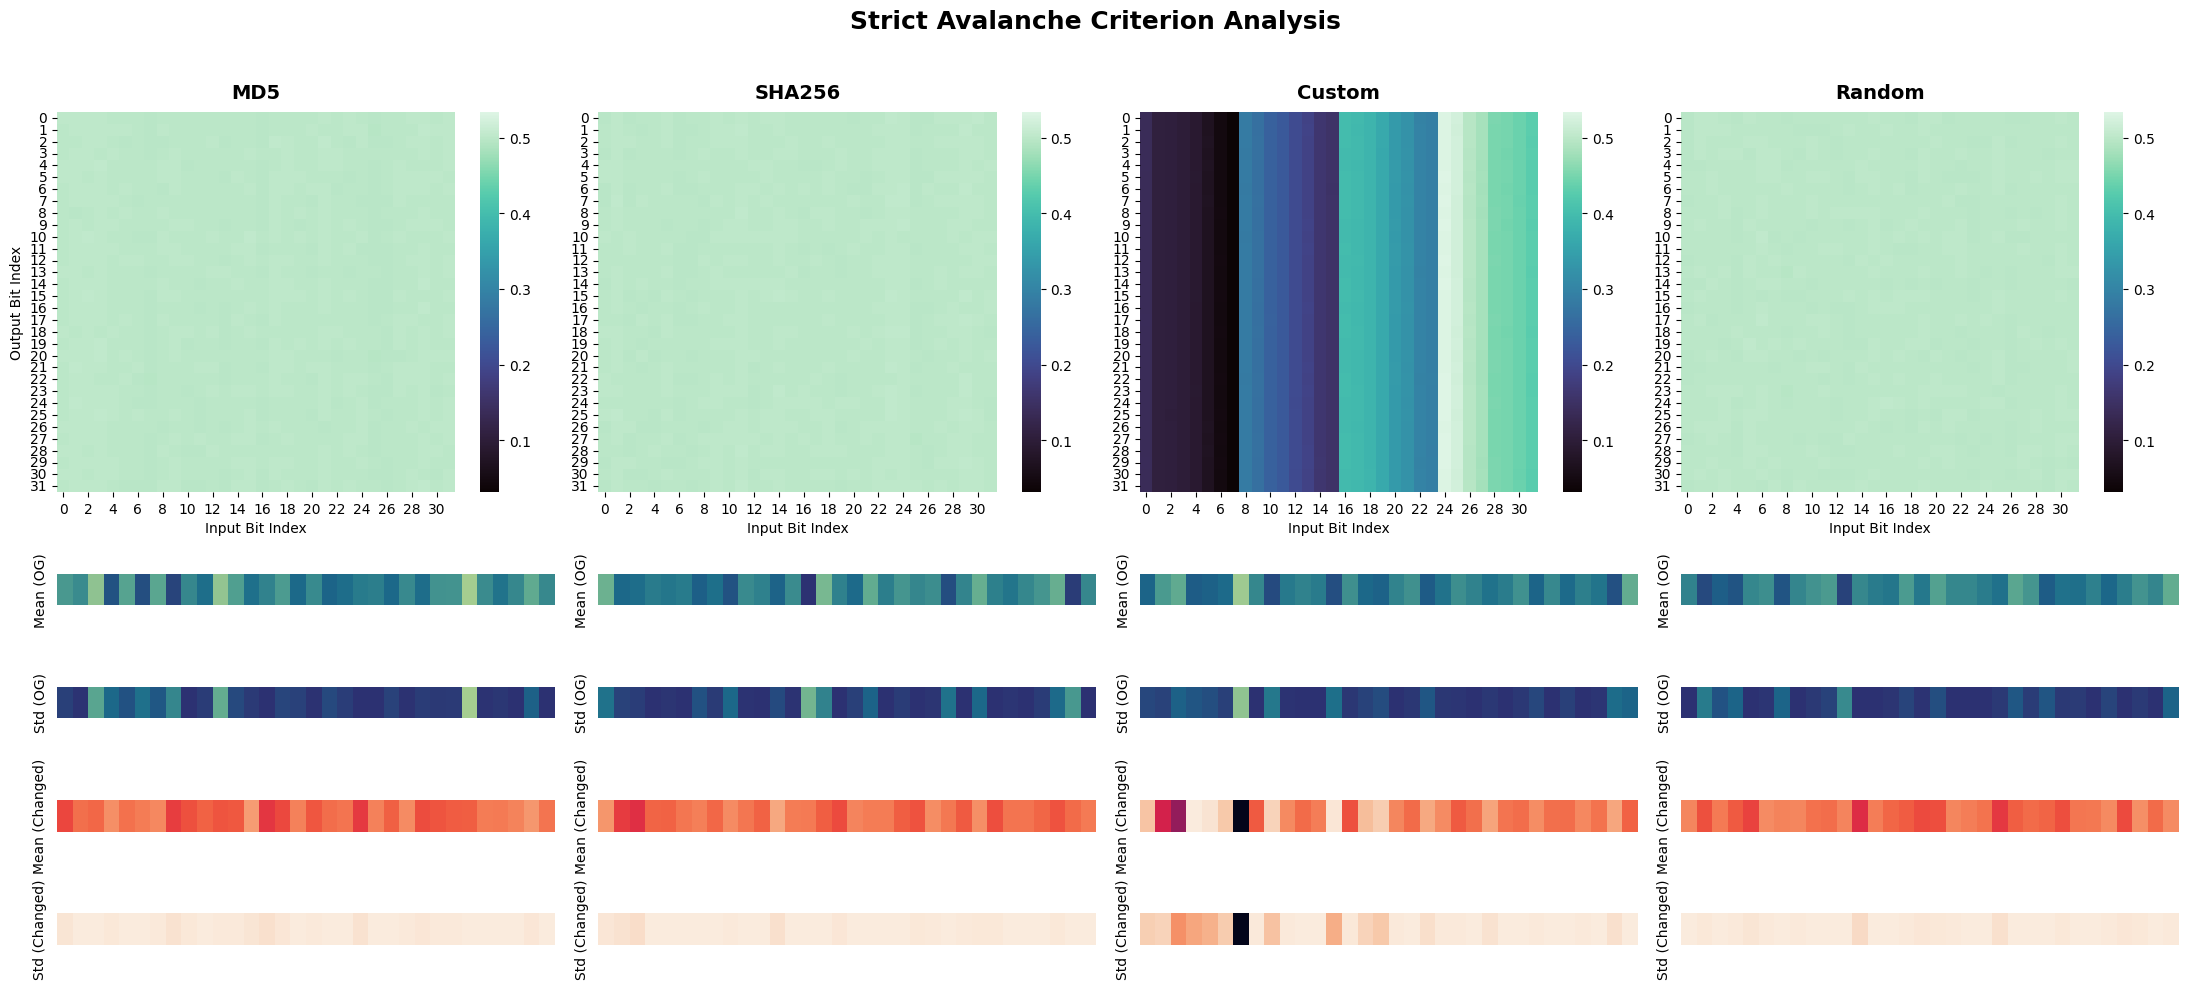

In [3]:
plot_SAC_results(all_results,
                 figsize=(22, 10),
                 title="Strict Avalanche Criterion Analysis",
                 x_label="Input Bit Index",
                 y_label="Output Bit Index",
                 annot_values=False,
                 normalize=True)

## BIC Analysis

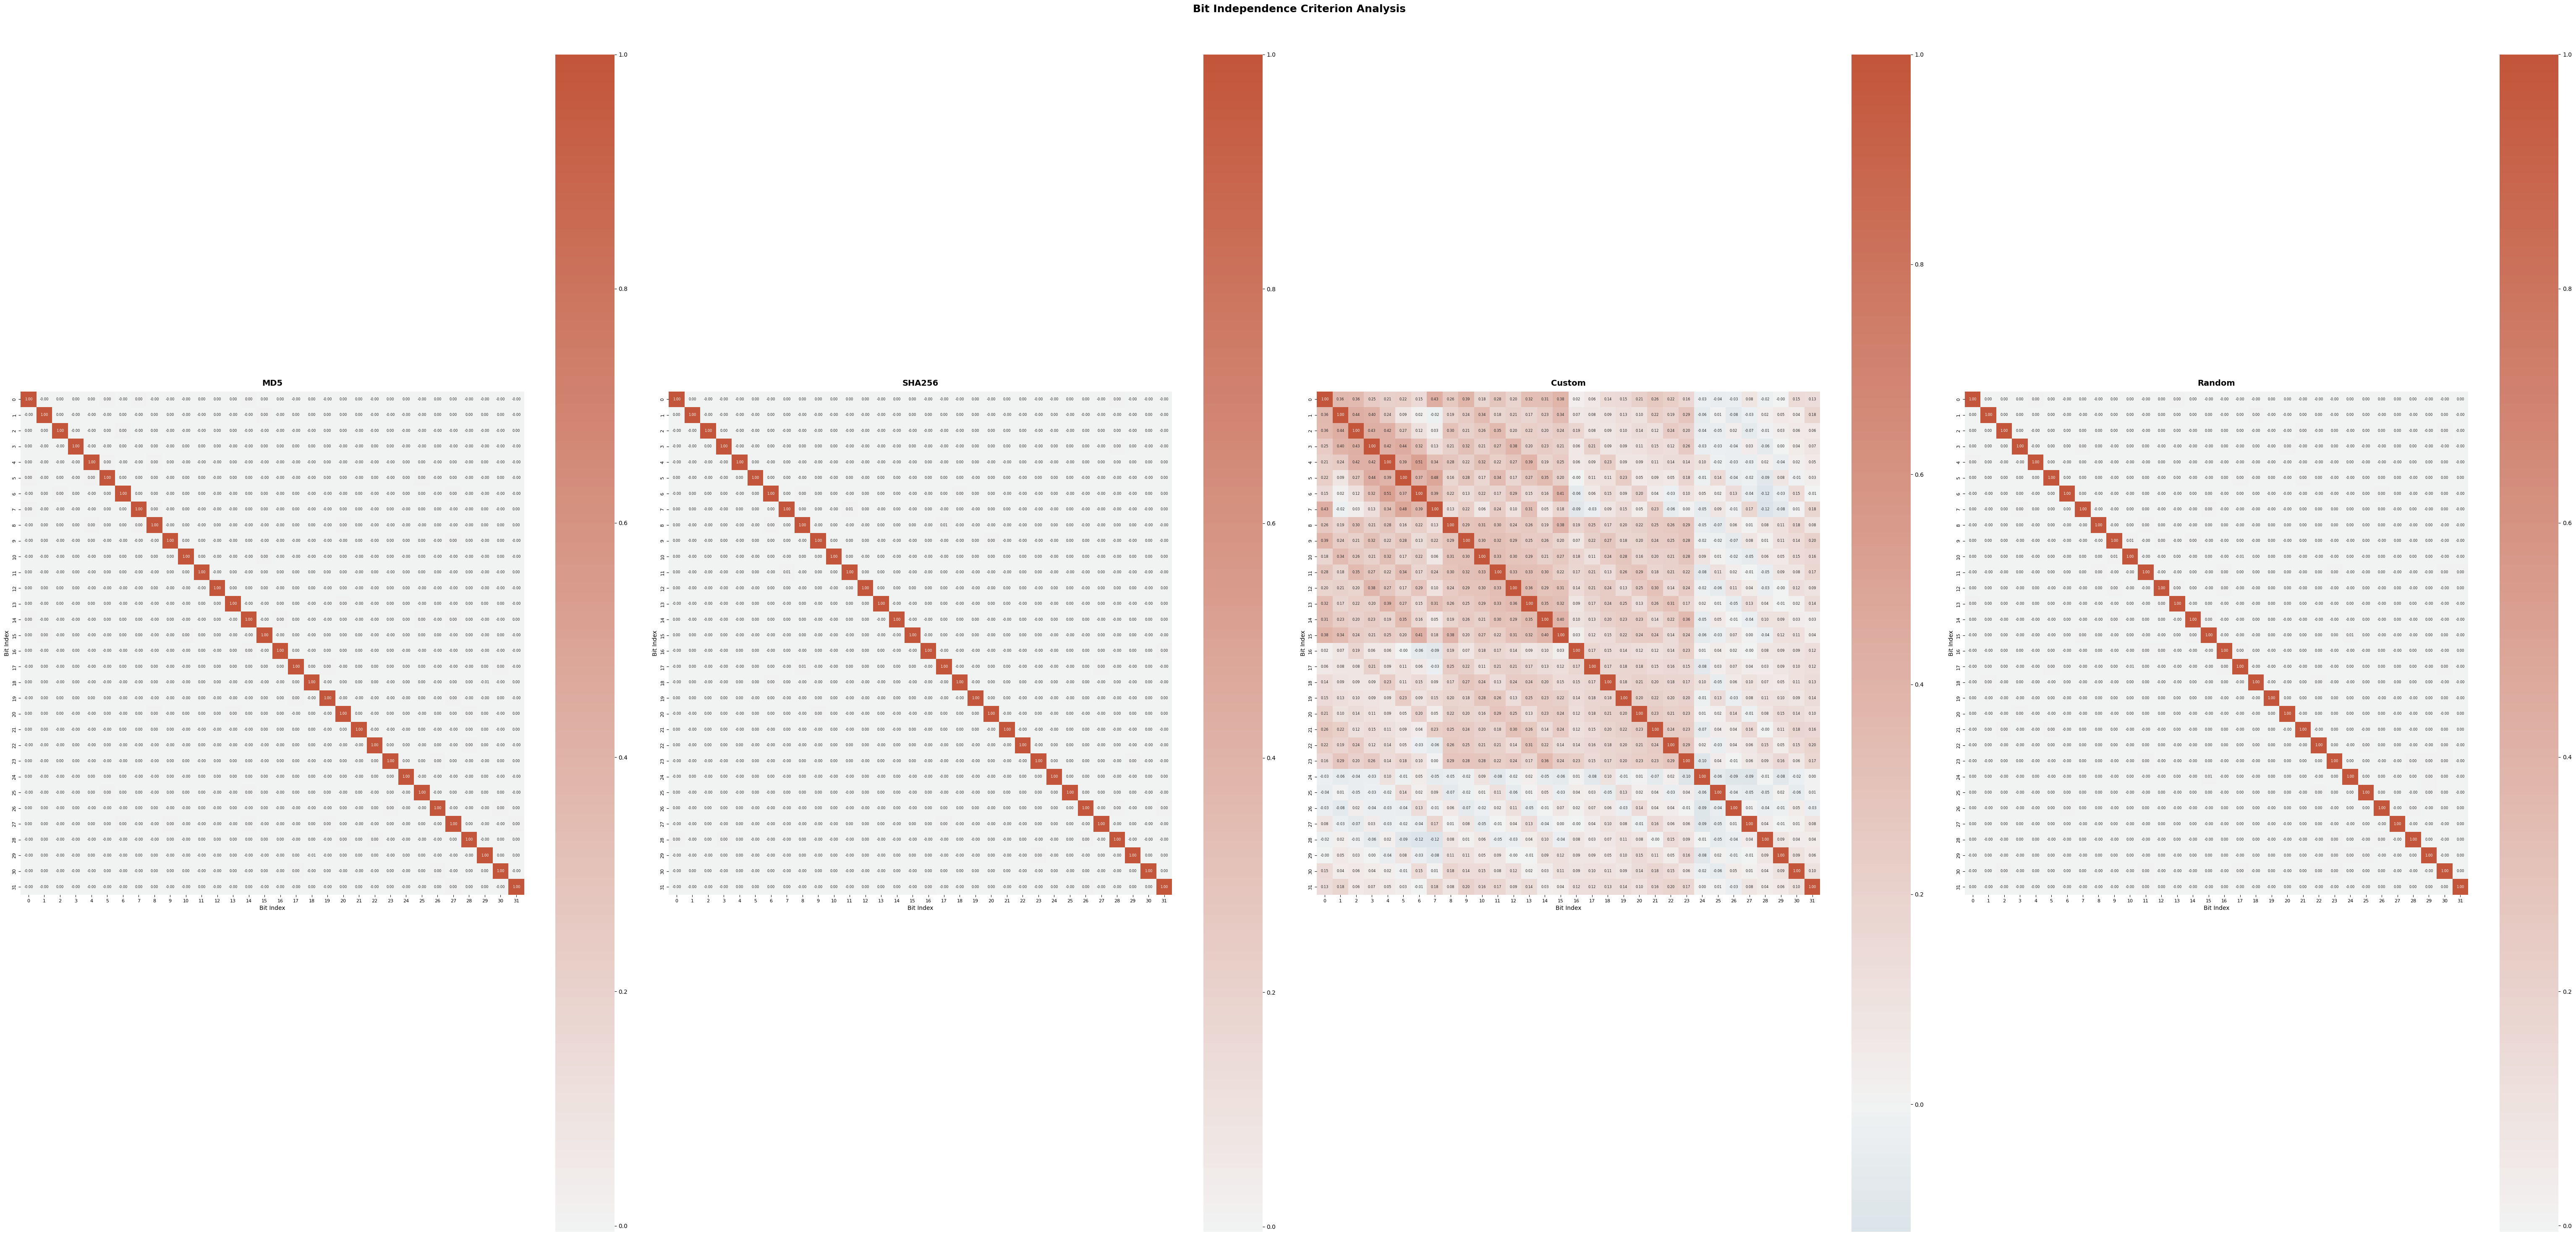

In [4]:
plot_BIC_results(all_results, figsize=(62, 30), title="Bit Independence Criterion Analysis",
                     x_label="Bit Index", y_label="Bit Index",
                     annot_values=True, normalize=False)

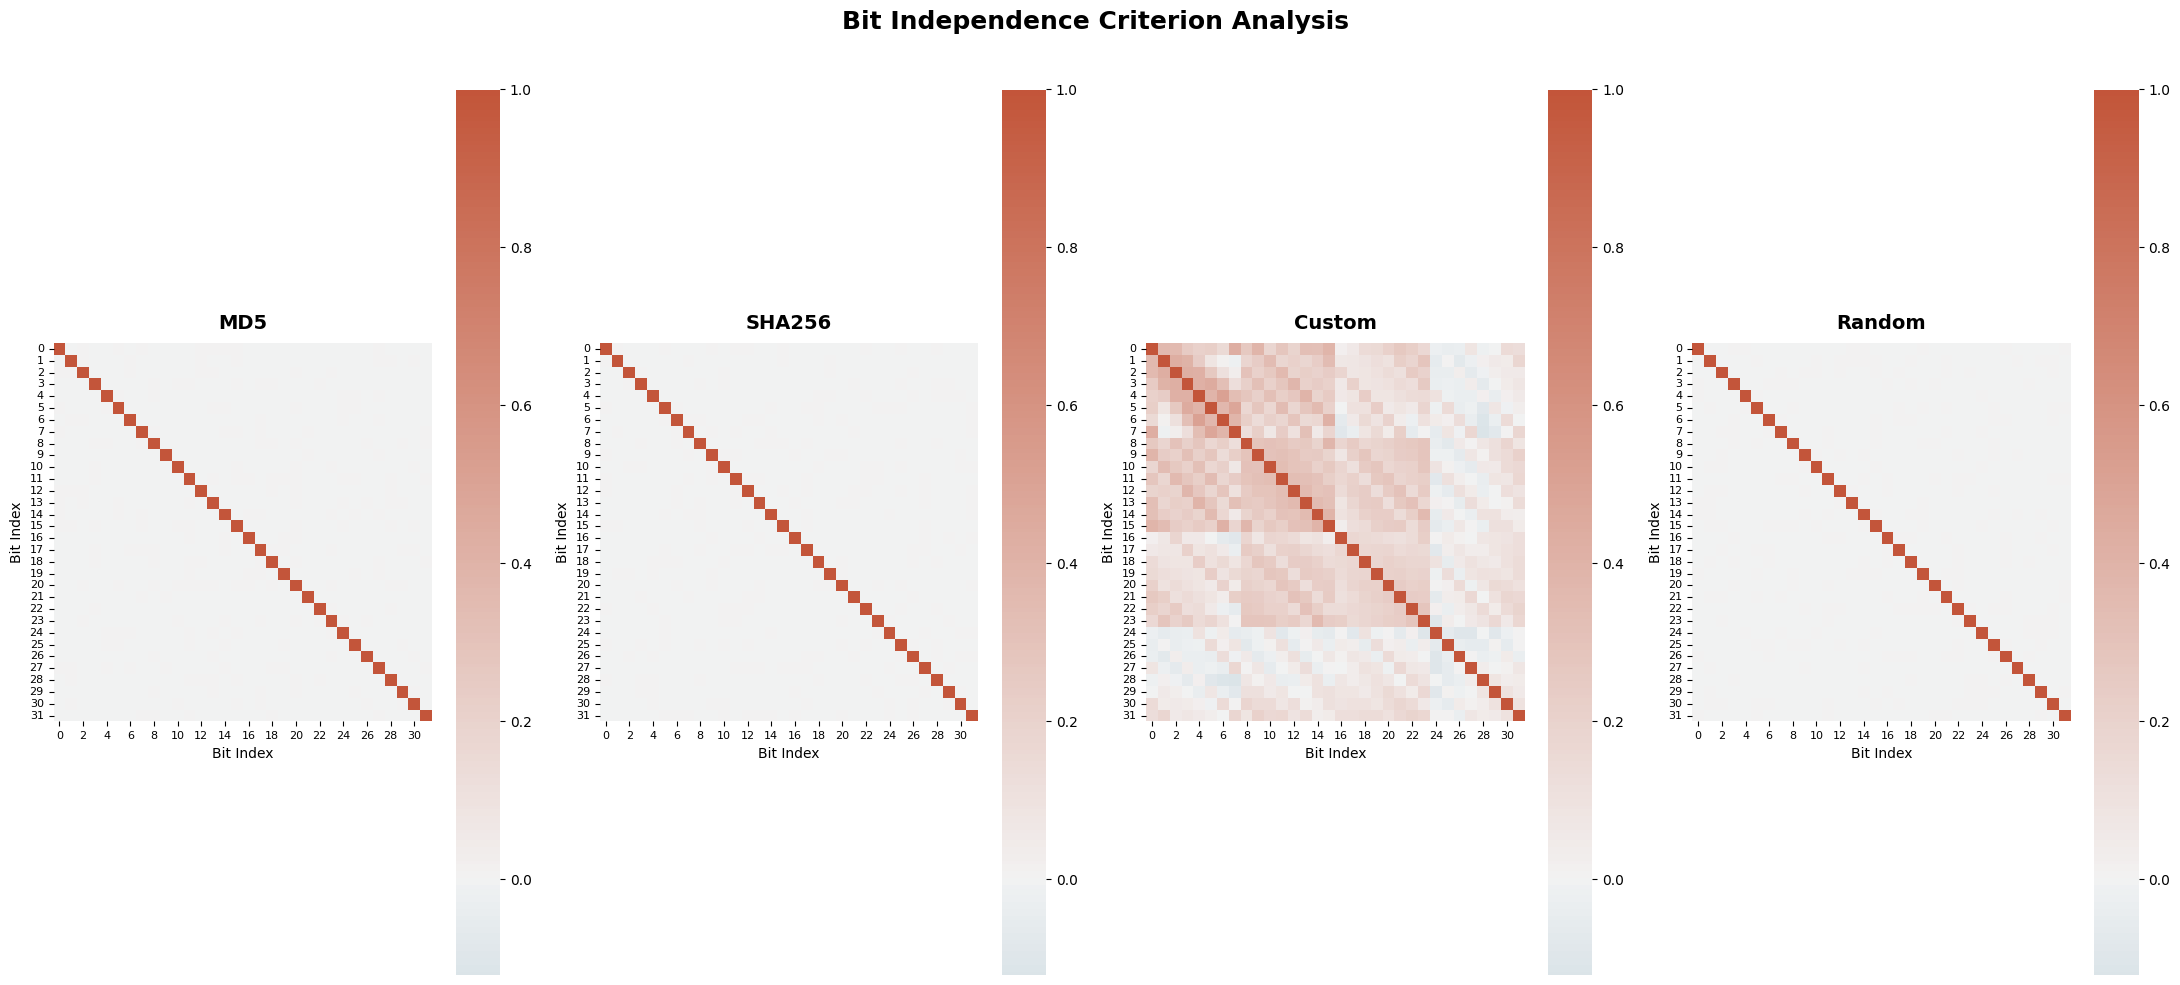

In [5]:
plot_BIC_results(all_results, figsize=(22, 10), title="Bit Independence Criterion Analysis",
                     x_label="Bit Index", y_label="Bit Index",
                     annot_values=False, normalize=True)

## Collisions Analysis

In [6]:
num_tests = 10
test_length = 3
algorithms = [
    ("bruteforce", "SHA256", AlgorithmArgs(2**512, 64, run_sha, "any")),
    ("bruteforce", "MD5", AlgorithmArgs(2**512, 64, run_md5, "any")),
    ("bruteforce", "Random", AlgorithmArgs(2**512, 64, run_random_hash, "any")),
    ("bruteforce", "Custom", AlgorithmArgs(2**512, 64, run_MatTheHash, "any")),

    ("random", "SHA256", AlgorithmArgs(2**512, 64, run_sha, "any")),
    ("random", "MD5", AlgorithmArgs(2**512, 64, run_md5, "any")),
    ("random", "Random", AlgorithmArgs(2**512, 64, run_random_hash, "any")),
    ("random", "Custom", AlgorithmArgs(2**512, 64, run_MatTheHash, "any")),
]

complete_results = {}

for algorithm, hashing_alg, args in algorithms:
    complete_results.setdefault(algorithm, {})[hashing_alg] = {}

for algorithm, hashing_alg, args in algorithms:
    results, statuses, distances, distances_mean, generations = test_colision_detection(
        num_tests=num_tests,
        colision_detection_algorithm=algorithm,
        test_length=test_length,
        byte_range=args.byte_range,
        num_bytes=args.num_bytes,
        hashing_algorithm=args.hashing_function,
        pretty_print=args.pretty_print,
        mode=args.mode,
        pop_size=args.pop_size,
        num_generations=args.num_generations,
        prob_mutation=args.prob_mutation,
        prob_crossover=args.prob_crossover,
        torunament_size=args.tournament_size,
        alg_name=hashing_alg
    )

    complete_results[algorithm][hashing_alg] = {
        "Num Checked Solutions": results,
        "Statuses": statuses,
        "Closest Distances": distances,
        "Mean Distances": distances_mean,
        "Num Generations": generations
    }

bruteforce for algorithm: SHA256 detection of colision mean iterations: 2766.0 standard deviation: 0.0
bruteforce for algorithm: MD5 detection of colision mean iterations: 4284.0 standard deviation: 0.0
bruteforce for algorithm: Random detection of colision mean iterations: 7581.0 standard deviation: 2801.5209440587805
bruteforce for algorithm: Custom detection of colision mean iterations: 16777216.0 standard deviation: 0.0
random for algorithm: SHA256 detection of colision mean iterations: 6011.5 standard deviation: 2530.536000534274
random for algorithm: MD5 detection of colision mean iterations: 6602.8 standard deviation: 2824.4380255194133
random for algorithm: Random detection of colision mean iterations: 4728.6 standard deviation: 1912.5986615074266
random for algorithm: Custom detection of colision mean iterations: 4590.6 standard deviation: 2063.6377686018445


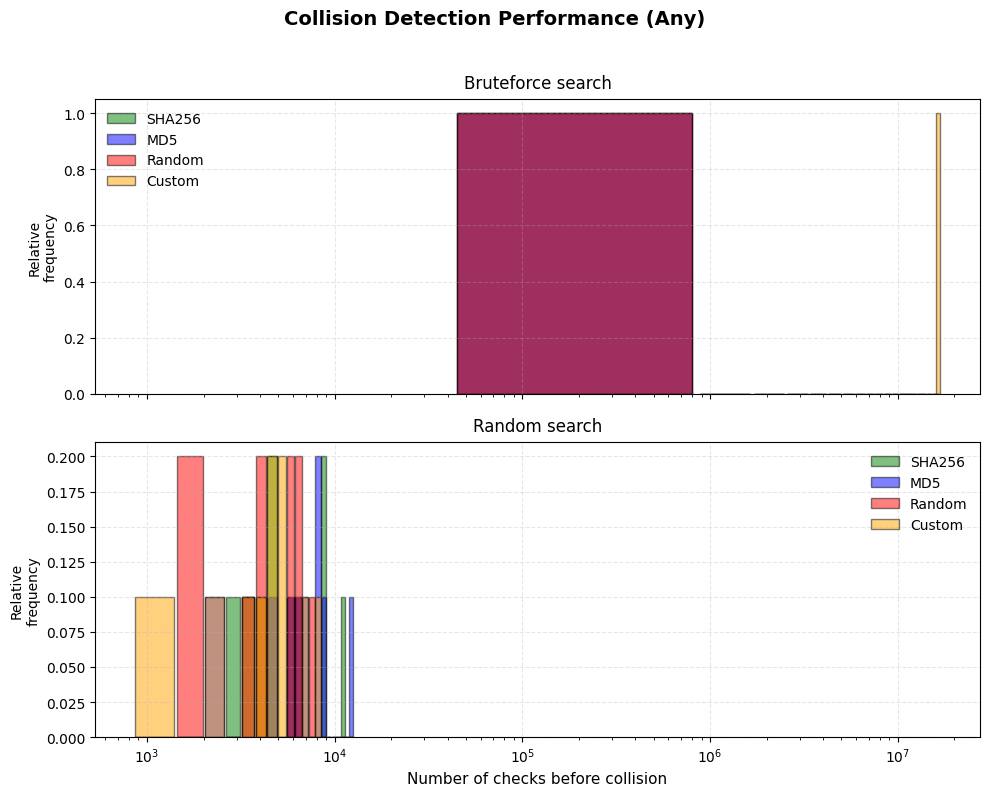

In [7]:
plot_collision_histograms(complete_results,
                          title="Collision Detection Performance (Any)", 
                          figsize=(10, 8), 
                          log_x=True,
                          log_y=False)

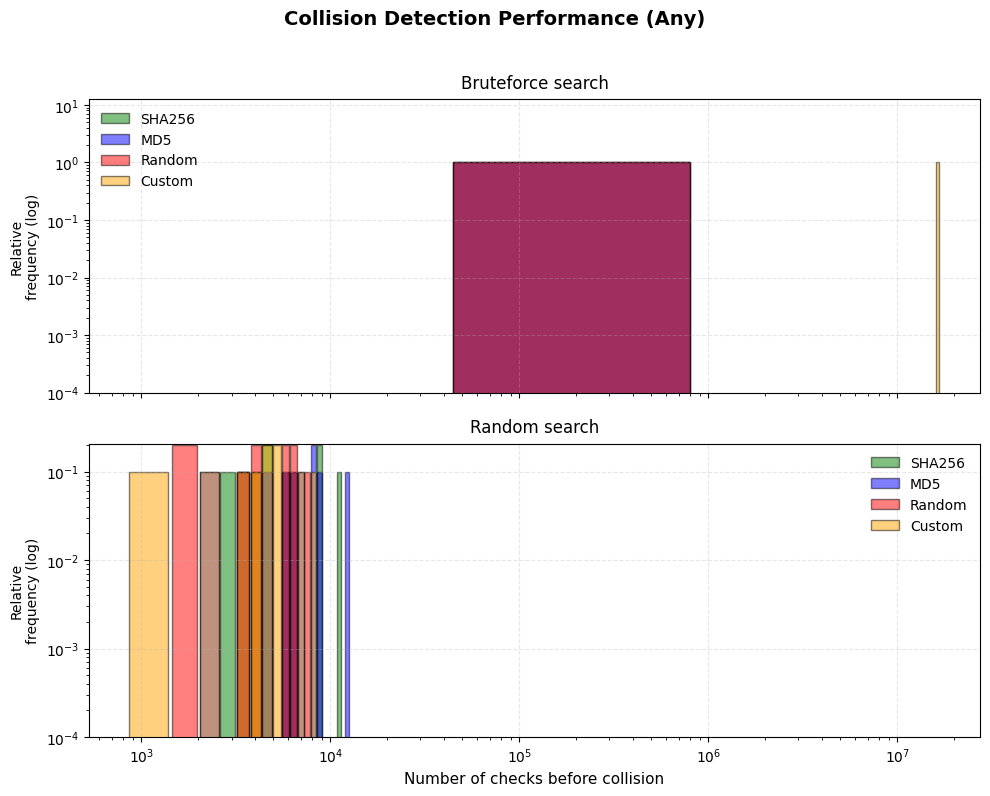

In [8]:
plot_collision_histograms(complete_results,
                          title="Collision Detection Performance (Any)", 
                          figsize=(10, 8), 
                          log_x=True,
                          log_y=True)

In [9]:
num_tests = 10
test_length = 2
algorithms = [
    ("bruteforce", "SHA256", AlgorithmArgs(2**512, 64, run_sha, "one")),
    ("bruteforce", "MD5", AlgorithmArgs(2**512, 64, run_md5, "one")),
    ("bruteforce", "Random", AlgorithmArgs(2**512, 64, run_random_hash, "one")),
    ("bruteforce", "Custom", AlgorithmArgs(2**512, 64, run_MatTheHash, "one")),
    
    ("random", "SHA256", AlgorithmArgs(2**512, 64, run_sha, "one")),
    ("random", "MD5", AlgorithmArgs(2**512, 64, run_md5, "one")),
    ("random", "Random", AlgorithmArgs(2**512, 64, run_random_hash, "one")),
    ("random", "Custom", AlgorithmArgs(2**512, 64, run_MatTheHash, "one")),
    
    ("steepest", "SHA256", AlgorithmArgs(2**512, 64, run_sha)),
    ("steepest", "MD5", AlgorithmArgs(2**512, 64, run_md5)),
    ("steepest", "Random", AlgorithmArgs(2**512, 64, run_random_hash)),
    ("steepest", "Custom", AlgorithmArgs(2**512, 64, run_MatTheHash)),
    
    ("greedy", "SHA256", AlgorithmArgs(2**512, 64, run_sha)),
    ("greedy", "MD5", AlgorithmArgs(2**512, 64, run_md5)),
    ("greedy", "Random", AlgorithmArgs(2**512, 64, run_random_hash)),
    ("greedy", "Custom", AlgorithmArgs(2**512, 64, run_MatTheHash)),
    
    ("genetic", "SHA256", AlgorithmArgs(2**512, 64, run_sha, None, 1000, 10000, 0.3, 0.2, 3)),
    ("genetic", "MD5", AlgorithmArgs(2**512, 64, run_md5, None, 1000, 10000, 0.3, 0.2, 3)),
    ("genetic", "Random", AlgorithmArgs(2**512, 64, run_random_hash, None, 1000, 10000, 0.3, 0.2, 3)),
    ("genetic", "Custom", AlgorithmArgs(2**512, 64, run_MatTheHash, None, 1000, 10000, 0.3, 0.2, 3)),
]

complete_results = {}

for algorithm, hashing_alg, args in algorithms:
    complete_results.setdefault(algorithm, {})[hashing_alg] = {}

for algorithm, hashing_alg, args in algorithms:
    results, statuses, distances, distances_mean, generations = test_colision_detection(
        num_tests=num_tests,
        colision_detection_algorithm=algorithm,
        test_length=test_length,
        byte_range=args.byte_range,
        num_bytes=args.num_bytes,
        hashing_algorithm=args.hashing_function,
        pretty_print=args.pretty_print,
        mode=args.mode,
        pop_size=args.pop_size,
        num_generations=args.num_generations,
        prob_mutation=args.prob_mutation,
        prob_crossover=args.prob_crossover,
        torunament_size=args.tournament_size,
        alg_name=hashing_alg
    )

    complete_results[algorithm][hashing_alg] = {
        "Num Checked Solutions": results,
        "Statuses": statuses,
        "Closest Distances": distances,
        "Mean Distances": distances_mean,
        "Num Generations": generations
    }


bruteforce for algorithm: SHA256 detection of colision mean iterations: 48531.6 standard deviation: 71863.3567198193
bruteforce for algorithm: MD5 detection of colision mean iterations: 64512.1 standard deviation: 71870.29823849349
bruteforce for algorithm: Random detection of colision mean iterations: 61633.0 standard deviation: 58512.7357213795
bruteforce for algorithm: Custom detection of colision mean iterations: 28863.4 standard deviation: 16482.64277474944
random for algorithm: SHA256 detection of colision mean iterations: 37028.0 standard deviation: 28832.299152166135
random for algorithm: MD5 detection of colision mean iterations: 118359.2 standard deviation: 80974.29425292944
random for algorithm: Random detection of colision mean iterations: 24006.6 standard deviation: 16314.273169222095
random for algorithm: Custom detection of colision mean iterations: 115137.8 standard deviation: 66421.81182232234
steepest for algorithm: SHA256 detection of colision mean iterations: 132986

/home/matthetab/miniconda3/envs/Knowlede_Extraction_Env/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/matthetab/miniconda3/envs/Knowlede_Extraction_Env/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


genetic for algorithm: SHA256 detection of colision mean iterations: 256400.0 standard deviation: 253972.51819832792
genetic for algorithm: MD5 detection of colision mean iterations: 156000.0 standard deviation: 146312.67887643914
genetic for algorithm: Random detection of colision mean iterations: 138800.0 standard deviation: 141345.53406457524
genetic for algorithm: Custom detection of colision mean iterations: 3040200.0 standard deviation: 4555891.0610329565


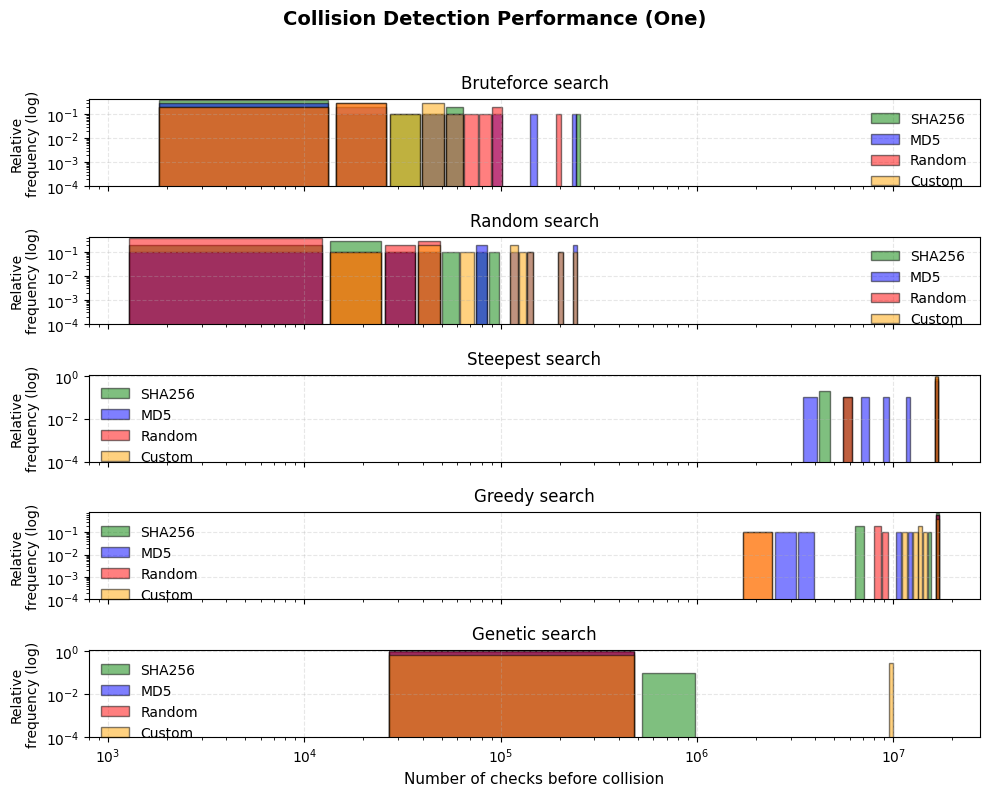

In [10]:
plot_collision_histograms(complete_results,
                          title="Collision Detection Performance (One)", 
                          figsize=(10, 8), 
                          log_x=True,
                          log_y=True)

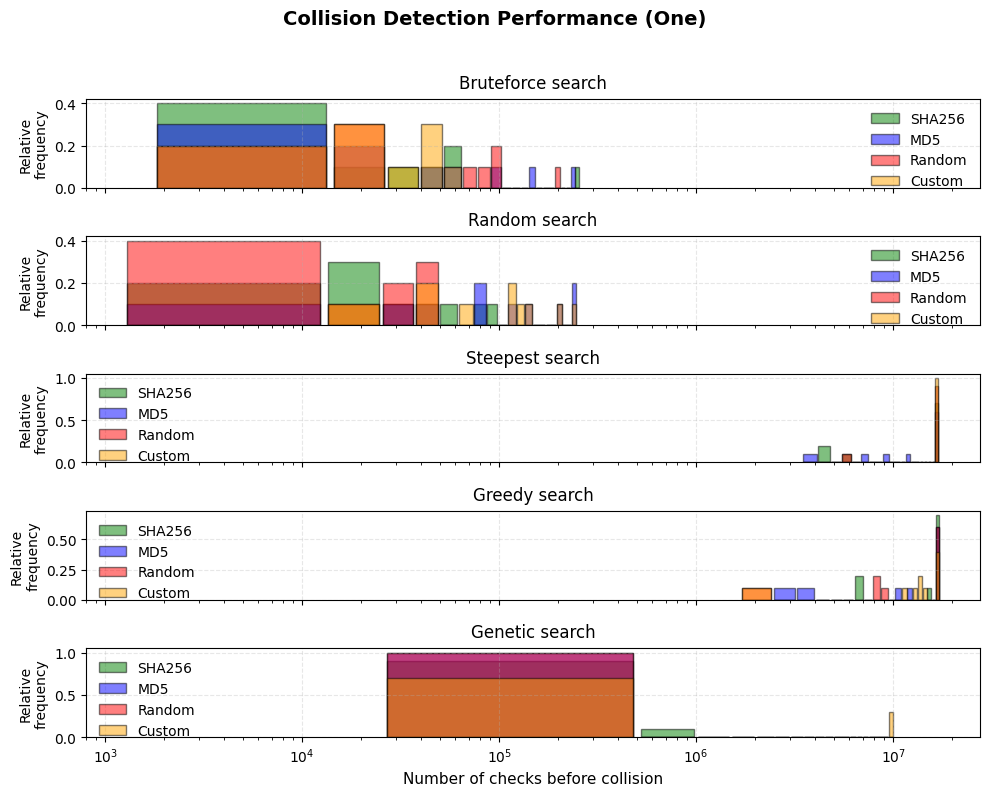

In [11]:
plot_collision_histograms(complete_results,
                          title="Collision Detection Performance (One)", 
                          figsize=(10, 8), 
                          log_x=True,
                          log_y=False)

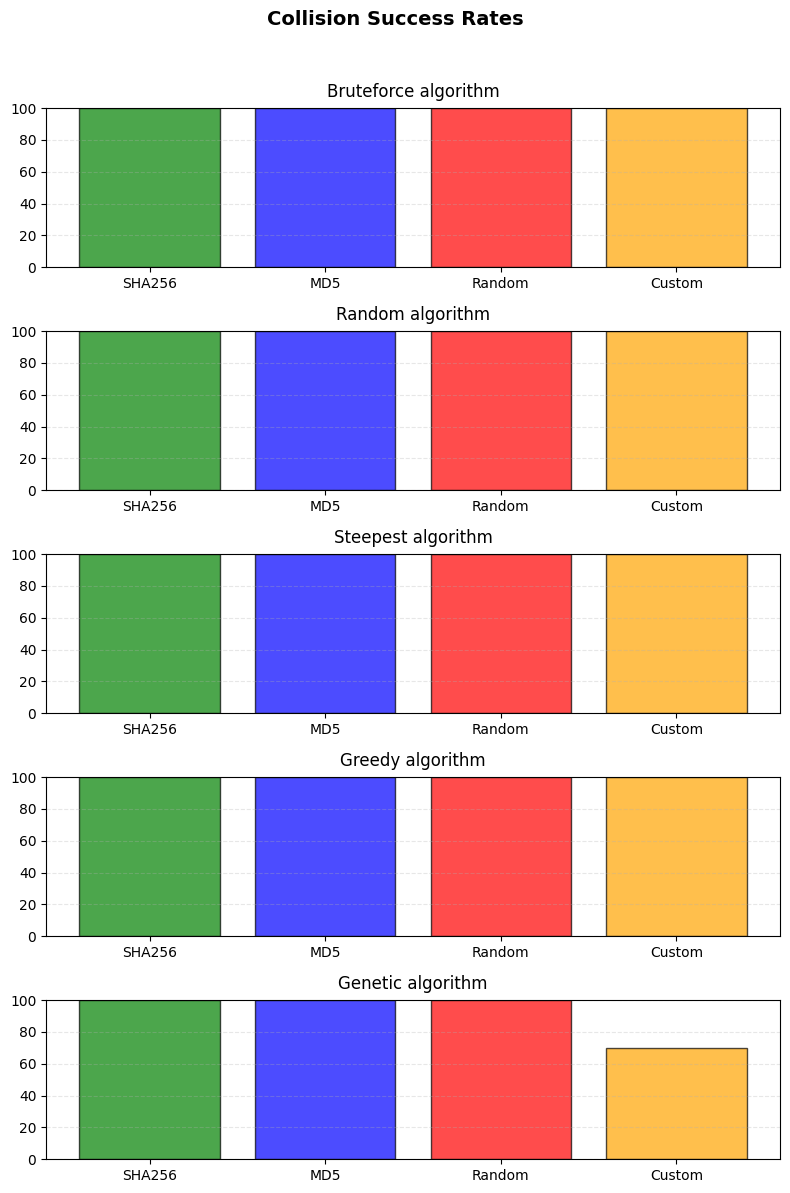

In [12]:
plot_collision_success_rates(complete_results,
                             title="Collision Success Rates",
                             figsize=(8, 12))

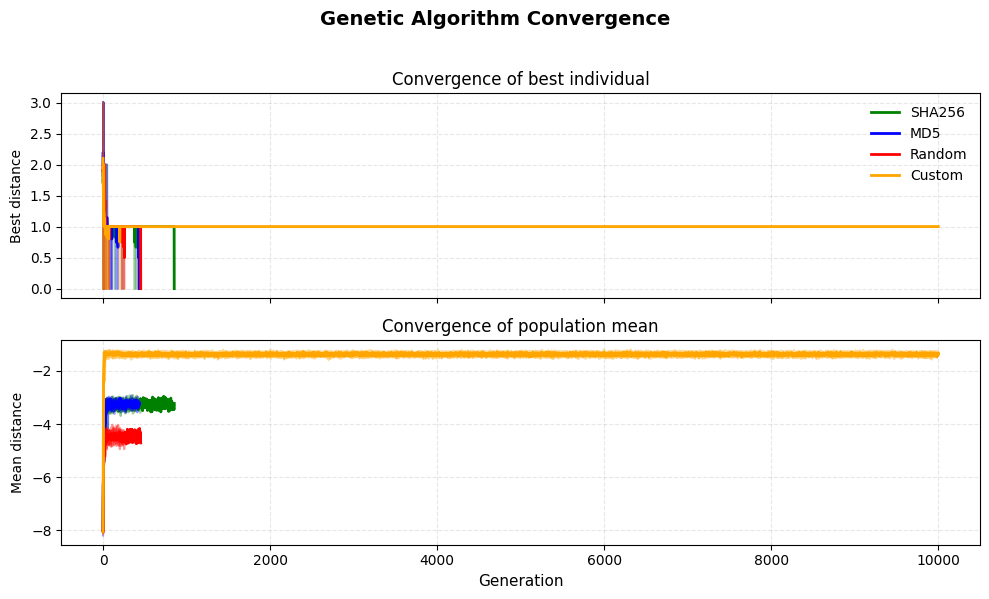

In [13]:
plot_genetic_convergence(complete_results,
                         title="Genetic Algorithm Convergence",
                         figsize=(10, 6))